### 문제 정의
- 붓꽃 꽃잎의 길이, 너비, 꽃받침의 길이, 너비 특징을 활용하여 품종 3가지 분류  
- KNN모델의 이웃 숫자 조절(하이퍼 파라미터 튜닝, K 조절)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# KNN 모델 사용
from sklearn.neighbors import KNeighborsClassifier #분류 모델
# 정확도 측정 도구
from sklearn.metrics import accuracy_score

### 데이터 수집

In [2]:
from sklearn.datasets import load_iris #iris 데이터 가져오기
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
# keys() : 키값 확인하기
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 문제와 답의 크기 확인
iris_data.data.shape
iris_data.target.shape
# 특성 이름, 순서 확인
iris_data.feature_names
iris_data['feature_names']

# sepal length/width : 꽃받침의 길이/너비
# petal length/width : 꽃잎의 길이/너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 정답 데이터 살펴보기
iris_data.target

# 정답 데이터 이름 살펴보기
iris_data.target_names
# setosa = 0; versicolor = 1; virginica = 2;

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 전처리

In [6]:
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()
# iris_df.head?를 통해서 함수에 대한 정보를 볼 수 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 문제와 답으로 분리
X = iris_df
y = iris_data.target

from sklearn.model_selection import train_test_split
# 문제, 답, 비율, 랜덤고정키값
# test_size = 0.3 => 30%만큼 평가 데이터로 분리
# random_state => 랜덤하게 섞이는 규칙을 고정(train_test_split은 랜덤으로 섞어줌)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [8]:
# 분리된 데이터 클래스(정답)별 개수 확인 7.5 : 2.5
import numpy as np
np.bincount(y_train)
np.bincount(y_test)
# 데이터가 다양성과 형평성을 유지해야함 -> 학습에 도움됨

array([14, 12, 12], dtype=int64)

### 탐색적 데이터 분석 (EDA)

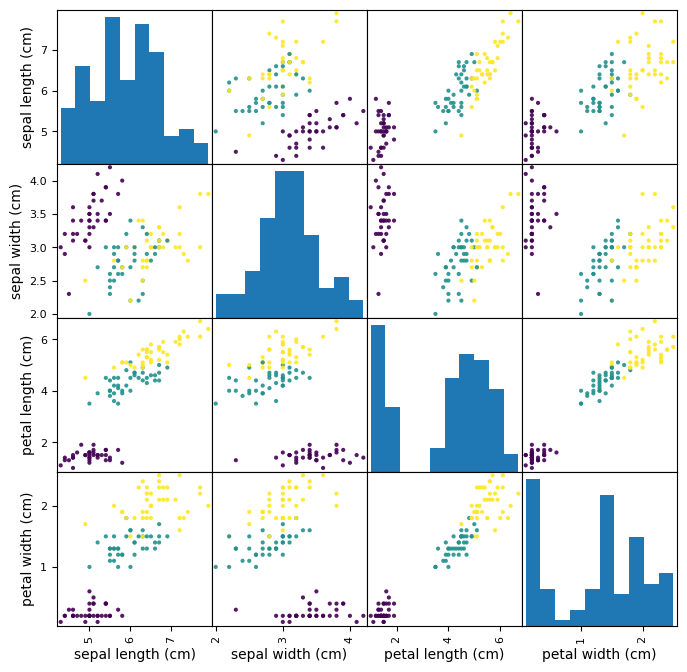

In [9]:
# 품종을 잘 분류해주는 기준은 어떤 컬럼인지
# 산점도 행렬 그래프 사용
pd.plotting.scatter_matrix(X_train, figsize= (8,8),c=y_train,alpha=0.9)
# alpha : 투명도!
plt.show()

### 모델 선택 및 학습

In [10]:
# 객체 생성
KNN_iris_model = KNeighborsClassifier(n_neighbors=3)

In [11]:
# fit -> 학습
KNN_iris_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가

In [12]:
# 평가 결과가 낮을 시 역순으로 단계적으로 다시 진행
# predict(테스트 문제)
pre = KNN_iris_model.predict(X_test)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
# 정확도 계산 -> accuracy_score
accuracy_score(pre,y_test)

1.0

### 하이퍼 파라미터 튜닝
- k값 범위 : 1~ 70
- train, test 비교

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

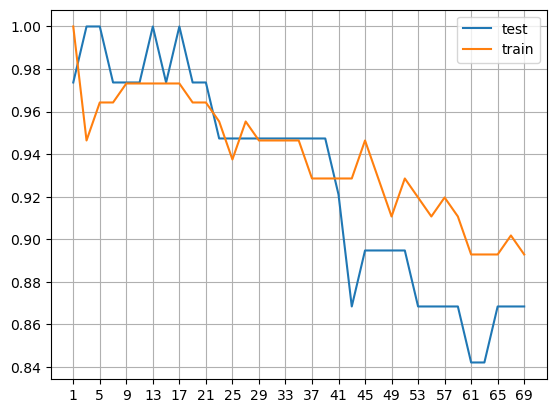

In [14]:
x = range(1,71,2)
acc_lst = []
acc_t_lst = []
for i in range(1,71,2):
    KNN_iris_model = KNeighborsClassifier(n_neighbors=i)
    KNN_iris_model.fit(X_train,y_train)
    pre = KNN_iris_model.predict(X_test)
    acc_lst.append(accuracy_score(pre,y_test))
    pre2 = KNN_iris_model.predict(X_train)
    acc_t_lst.append(accuracy_score(pre2,y_train))

plt.plot(x,acc_lst,label='test')
plt.plot(x,acc_t_lst,label = 'train')
plt.legend(loc='best')
plt.grid() #격자 표시
plt.xticks(range(1,71,4)) # x축 간격 조절
plt.show()